#**Group Project: Income Prediction**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 1.0.1
-------------------------


In [ ]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/DMGroup/cleaned_adult.csv')
#df = pd.read_csv('/content/sample_data/adult.csv')
df= pd.read_csv('cleaned_adult.csv')

In [ ]:
df.head()

,Unnamed: 0,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Gov,workclass_Others,workclass_Private,workclass_Self,race_Others,race_White,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_NA,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
0,0,90,9,0,4356,40,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,82,9,0,4356,18,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,66,10,0,4356,40,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,3,54,4,0,3900,40,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,4,41,10,0,3900,40,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## 4. Model 

### Normal aproach

In [ ]:
# Import some evaluation functions
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,roc_auc_score, classification_report, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, plot_roc_curve, roc_curve, plot_confusion_matrix

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# num_col_names = ['age','education.num','capital.gain','capital.loss','hours.per.week']
# num_features = X_train[num_col_names]
# test_num_features = X_test[num_col_names]

# ct = ColumnTransformer([
#         ('somename', StandardScaler(), ['age','education.num','capital.gain','capital.loss','hours.per.week'])
#     ], remainder='passthrough')

# features = ct.fit_transform(num_features)
# test_feature = ct.transform(test_num_features)
# X_train[num_col_names] = features
# X_test[num_col_names] = test_feature

In [ ]:
# Import some evaluation functions
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,roc_auc_score, classification_report, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, plot_roc_curve, roc_curve, plot_confusion_matrix

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
train_models = ['KNN','DecisionTree','RandomForest','XGB','LGBM','GNB','BNB']
model_accuracy_train = []
model_accuracy = []
model_balanced_accuracy = []

              precision    recall  f1-score   support

           0       0.81      0.99      0.90      4927
           1       0.93      0.30      0.45      1586

    accuracy                           0.82      6513
   macro avg       0.87      0.65      0.67      6513
weighted avg       0.84      0.82      0.79      6513



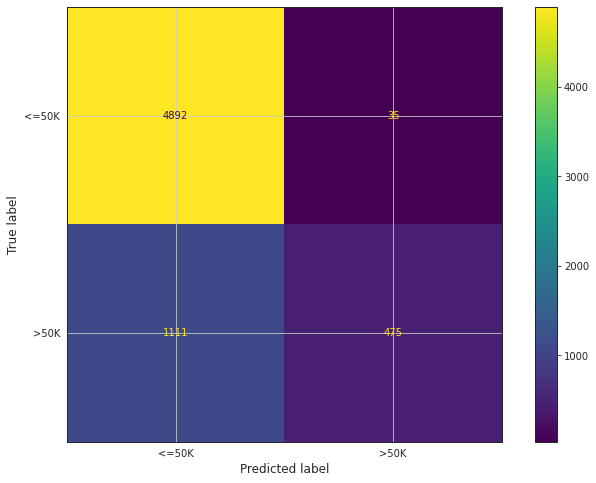

In [ ]:
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier(n_neighbors=20, metric='manhattan', weights='uniform')
knn_model.fit(X_train, y_train)

knn_pred_train = knn_model.predict(X_train)
knn_pred = knn_model.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, knn_pred_train))
model_accuracy.append(accuracy_score(y_test, knn_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, knn_pred))

plot_confusion_matrix(knn_model, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)

print(classification_report(y_test, knn_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4927
           1       0.59      0.78      0.67      1586

    accuracy                           0.81      6513
   macro avg       0.75      0.80      0.77      6513
weighted avg       0.84      0.81      0.82      6513

0.8009645745923266


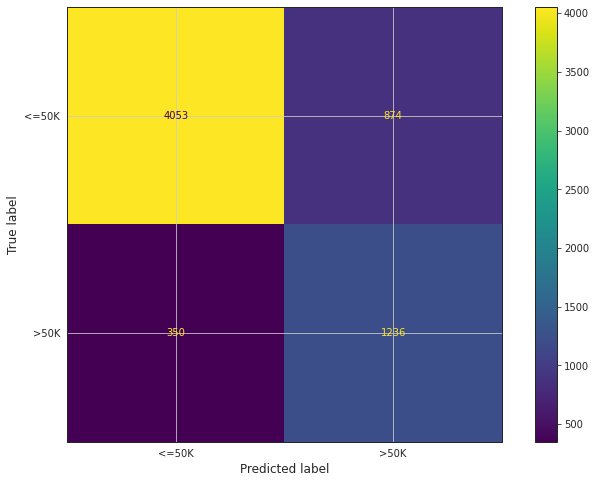

In [ ]:
from sklearn.tree import DecisionTreeClassifier         
weights = {0:1, 1:3}
decision_tree_model = DecisionTreeClassifier(max_depth = 20,min_samples_split = 10,class_weight=weights)
decision_tree_model.fit(X_train, y_train)

dt_pred_train = decision_tree_model.predict(X_train)
dt_pred = decision_tree_model.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, dt_pred_train))
model_accuracy.append(accuracy_score(y_test, dt_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, dt_pred))

plot_confusion_matrix(decision_tree_model, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, dt_pred, zero_division=0))

print(balanced_accuracy_score(y_test, dt_pred))

#">50K": 1, "<=50K"

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4927
           1       0.79      0.58      0.67      1586

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.79      6513
weighted avg       0.85      0.86      0.85      6513

0.7630803168888727


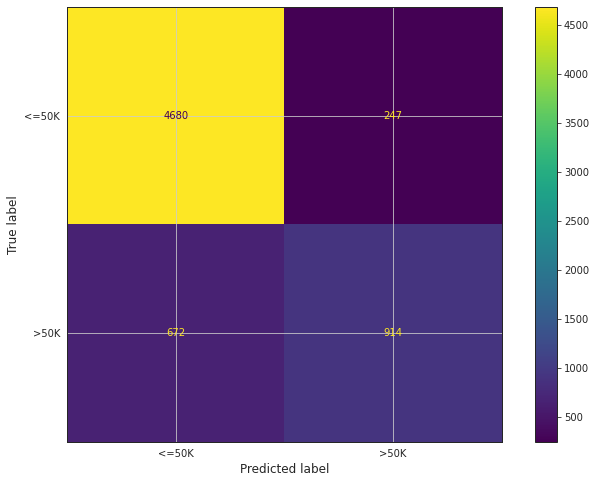

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 900,max_depth = 20,min_samples_split = 10)
rf.fit(X_train, y_train)

rf_pred_train = rf.predict(X_train)
rf_pred = rf.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, rf_pred_train))
model_accuracy.append(accuracy_score(y_test, rf_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, rf_pred))

plot_confusion_matrix(rf, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, rf_pred, zero_division=0))

print(balanced_accuracy_score(y_test, rf_pred))

# balanced_accuracy.append(balanced_accuracy_score(y_test, rf_pred))

In [ ]:
print(model_accuracy)
print(model_accuracy_train)

[0.8240442192538001, 0.8120681713496085, 0.8588975894365116]
[0.8337300368550369, 0.8913544226044227, 0.9098587223587223]


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4927
           1       0.78      0.63      0.70      1586

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513

0.7863038060602834


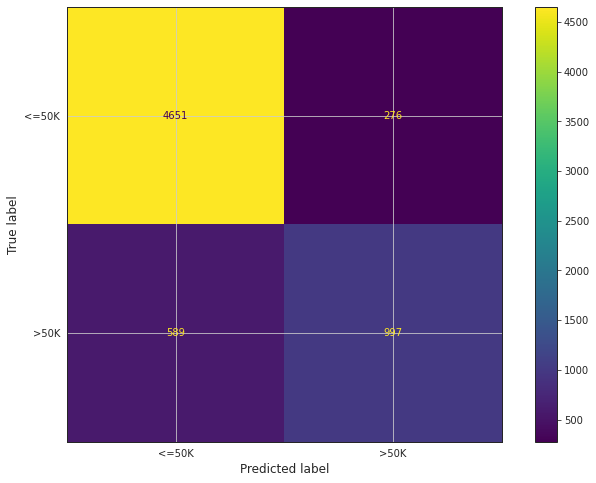

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1,n_estimators = 900)
xgb.fit(X_train, y_train)

xgb_pred_train =  xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, xgb_pred_train))
model_accuracy.append(accuracy_score(y_test, xgb_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, xgb_pred))


plot_confusion_matrix(xgb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, xgb_pred, zero_division=0))
print(balanced_accuracy_score(y_test,xgb_pred))


              precision    recall  f1-score   support

           0       0.92      0.87      0.90      4927
           1       0.66      0.77      0.71      1586

    accuracy                           0.85      6513
   macro avg       0.79      0.82      0.80      6513
weighted avg       0.86      0.85      0.85      6513



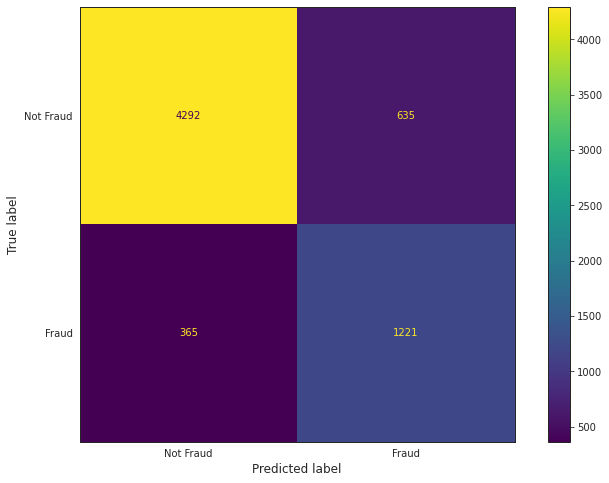

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators = 900,is_unbalance = True)


lgb.fit(X_train, y_train)

lgb_pred_train = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, lgb_pred_train))
model_accuracy.append(accuracy_score(y_test, lgb_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, lgb_pred))


plot_confusion_matrix(lgb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
print(classification_report(y_test, lgb_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4927
           1       0.57      0.76      0.65      1586

    accuracy                           0.80      6513
   macro avg       0.74      0.79      0.76      6513
weighted avg       0.83      0.80      0.81      6513



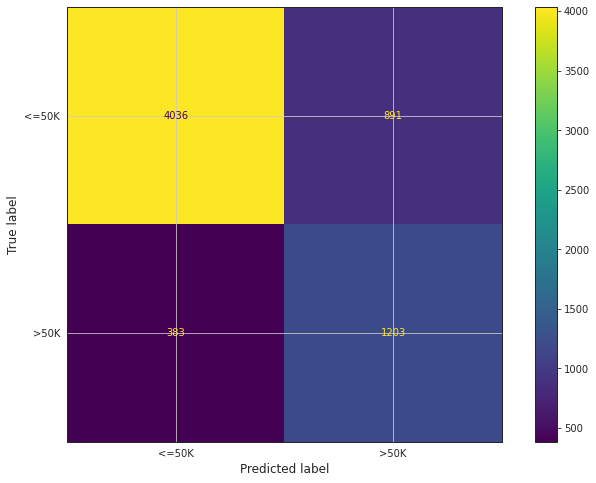

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred_train = gnb.predict(X_train)
gnb_pred = gnb.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, gnb_pred_train))
model_accuracy.append(accuracy_score(y_test, gnb_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, gnb_pred))

plot_confusion_matrix(gnb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, gnb_pred, zero_division=0))



              precision    recall  f1-score   support

           0       0.92      0.72      0.81      4927
           1       0.48      0.80      0.60      1586

    accuracy                           0.74      6513
   macro avg       0.70      0.76      0.70      6513
weighted avg       0.81      0.74      0.76      6513

0.7576086269368851


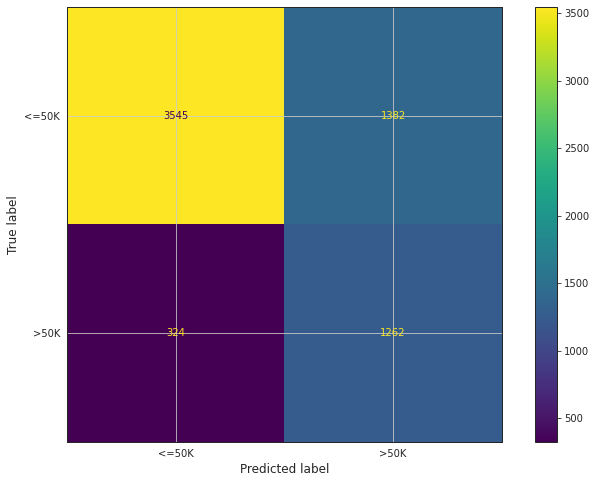

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

bnb_pred_train = bnb.predict(X_train)
bnb_pred = bnb.predict(X_test)

model_accuracy_train.append(accuracy_score(y_train, bnb_pred_train))
model_accuracy.append(accuracy_score(y_test, bnb_pred))
model_balanced_accuracy.append(balanced_accuracy_score(y_test, bnb_pred))

plot_confusion_matrix(bnb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, bnb_pred, zero_division=0))

print(balanced_accuracy_score(y_test, bnb_pred))

In [ ]:
train_models = ['KNN','DecisionTree','RandomForest','XGB','LGBM','GNB','BNB']

In [ ]:
# List the accuracy of all the models
2
tr_split = pd.DataFrame({'Models': train_models, 'Train Accuracy': model_accuracy_train,'Test Accuracy': model_accuracy, 'IB Accuracy': model_balanced_accuracy})
tr_split.head(10)

,Models,Train Accuracy,Test Accuracy,IB Accuracy
0,KNN,0.833730,0.824044,0.646196
1,DecisionTree,0.891354,0.812068,0.800965
2,RandomForest,0.909859,0.858898,0.763080
3,XGB,0.890318,0.867189,0.786304
4,LGBM,0.940610,0.846461,0.820490
5,GNB,0.808354,0.804391,0.788836
6,BNB,0.734106,0.738062,0.757609


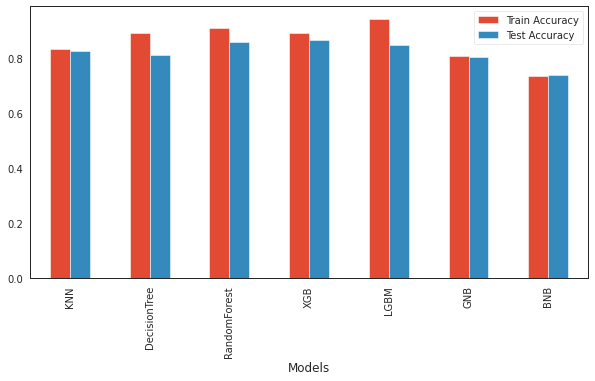

In [ ]:
tr_split.plot(x="Models", y=["Train Accuracy", "Test Accuracy"], kind="bar",figsize=(10,5))

plt.show()

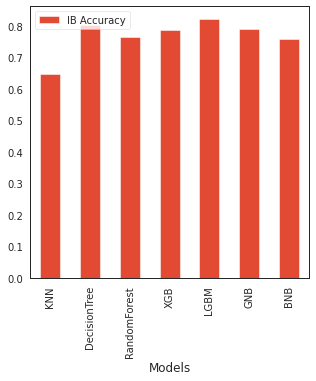

In [ ]:
tr_split.plot(x="Models", y=["IB Accuracy"], kind="bar",figsize=(5,5))

plt.show()

#### Model tuning 

In [ ]:
tun_models = ['KNN','Decision Tree']
tun_acc = []
# tun_acc_ib = []

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Try to tune the number of neighbors k for k-NN:

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 25)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


({'knn__n_neighbors': 21}, 0.8387209844001993)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4927
           1       0.93      0.30      0.45      1586

    accuracy                           0.82      6513
   macro avg       0.87      0.65      0.67      6513
weighted avg       0.84      0.82      0.79      6513

0.8320408476658476
0.8234300629510211
0.6455762326691


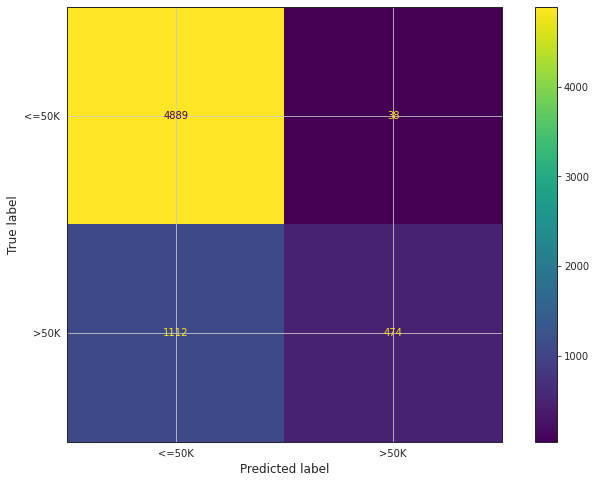

In [ ]:
# build knn with best params
knn_model_bp = neighbors.KNeighborsClassifier(n_neighbors=21)
knn_model_bp.fit(X_train, y_train)

knn_pred_train = knn_model_bp.predict(X_train)
knn_pred = knn_model_bp.predict(X_test)

# model_accuracy_train.append(accuracy_score(y_train, knn_pred_train))
# model_accuracy.append(accuracy_score(y_test, knn_pred))
# model_balanced_accuracy.append(balanced_accuracy_score(y_test, knn_pred))

plot_confusion_matrix(knn_model_bp, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)

print(classification_report(y_test, knn_pred, zero_division=0))
print(accuracy_score(y_train, knn_pred_train))
print(accuracy_score(y_test, knn_pred))
print(balanced_accuracy_score(y_test, knn_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()
params = {
    "criterion":['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

dt_grid = GridSearchCV(dt_clf, param_grid=params, cv = 10,verbose=1,n_jobs=-1,scoring='accuracy')
dt_grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [ ]:
print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.8575323214543695


              precision    recall  f1-score   support

           0       0.85      0.97      0.91      4927
           1       0.83      0.48      0.61      1586

    accuracy                           0.85      6513
   macro avg       0.84      0.73      0.76      6513
weighted avg       0.85      0.85      0.83      6513

0.849531705819131
0.8619855651105651


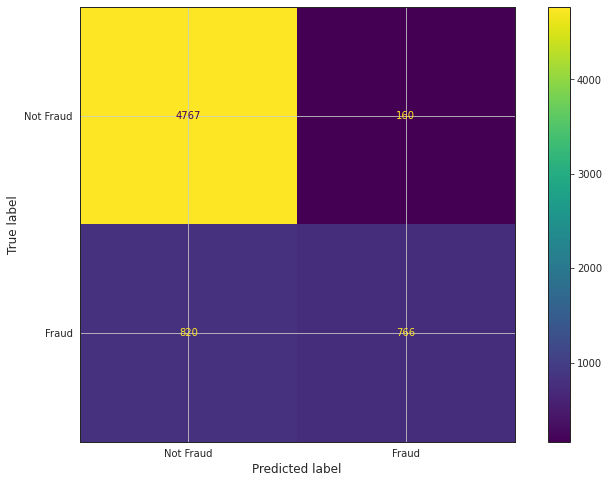

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=4,min_samples_split=3)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
y_pred_train = decision_tree_model.predict(X_train)

plot_confusion_matrix(decision_tree_model, X_test, y_test, values_format = '', 
                      display_labels=['Not Fraud', 'Fraud'])
plt.grid(None)
print(classification_report(y_test, y_pred, zero_division=0))
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_train))
# print(balanced_accuracy_score(y_train, y_test))

### Advanced Model

In [ ]:
# Import important libraries
import torch
from torch import nn
from torch.utils import data

### Undersample Approach

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

In [ ]:
# rus = RandomOverSampler(random_state=34)
# # y_1 = df_us['income']
# # X_1 = df_us.drop('income', axis=1)
# X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
# print(f'Data set size before Under Sampling: {X_train.shape}')
# print(f'Data set size after Under Sampling: {X_train_us.shape}')

Data set size before Under Sampling: (26048, 42)
Data set size after Under Sampling: (39586, 42)


In [ ]:
df_us = df.copy() 
rus = RandomUnderSampler(sampling_strategy='not minority',random_state=34)
y = df_us['income']
X = df_us.drop('income', axis=1)
X_us, y_us = rus.fit_resample(X, y)
print(f'Data set size before Under Sampling: {X.shape}')
print(f'Data set size after Under Sampling: {X_us.shape}')

Data set size before Under Sampling: (32561, 42)
Data set size after Under Sampling: (15682, 42)


In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.20, random_state=33)

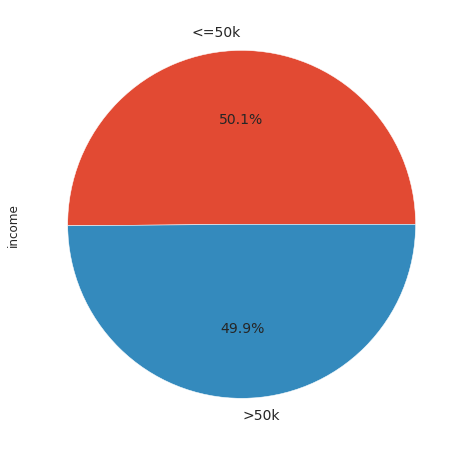

In [ ]:
y_train_us.value_counts().plot(kind='pie', labels=['<=50k','>50k'],  fontsize=14,autopct='%1.1f%%')

In [ ]:
models = ['DT','RF','XGB','LGBM','GNB','BNB']
train_accuracy = []
accuracy = []

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1552
           1       0.80      0.87      0.83      1585

    accuracy                           0.82      3137
   macro avg       0.83      0.82      0.82      3137
weighted avg       0.83      0.82      0.82      3137



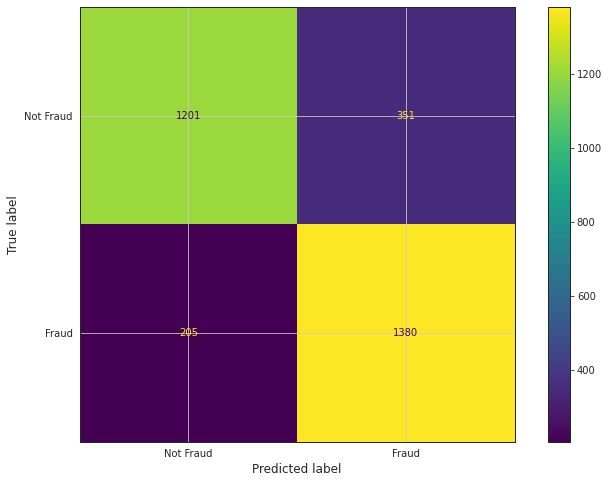

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=5)
decision_tree_model.fit(X_train_us, y_train_us)

dt_pred_train_us = decision_tree_model.predict(X_train_us)
dt_pred_us = decision_tree_model.predict(X_test_us)

plot_confusion_matrix(decision_tree_model, X_test_us, y_test_us, values_format = '', 
                      display_labels=['Not Fraud', 'Fraud'])
plt.grid(None)
print(classification_report(y_test_us, dt_pred_us, zero_division=0))

train_accuracy.append(accuracy_score(y_train_us, dt_pred_train_us))
accuracy.append(accuracy_score(y_test_us, dt_pred_us))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1552
           1       0.82      0.86      0.84      1585

    accuracy                           0.83      3137
   macro avg       0.84      0.83      0.83      3137
weighted avg       0.84      0.83      0.83      3137



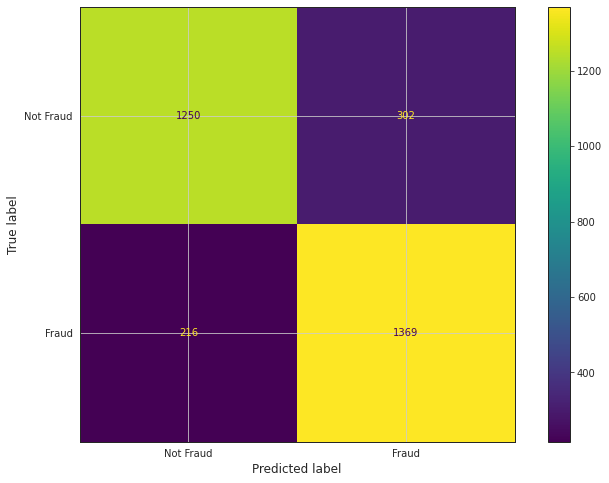

In [ ]:
rf = RandomForestClassifier(n_estimators = 900,max_depth = 20,min_samples_split = 10)

# fit the predictor and target
rf.fit(X_train_us, y_train_us)
         
# predict

rf_pred_train =  rf.predict(X_train_us)
rf_pred = rf.predict(X_test_us)

plot_confusion_matrix(rf, X_test_us, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test_us, rf_pred, zero_division=0))

train_accuracy.append(accuracy_score(y_train_us, rf_pred_train))
accuracy.append(accuracy_score(y_test_us, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1552
           1       0.83      0.86      0.84      1585

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137



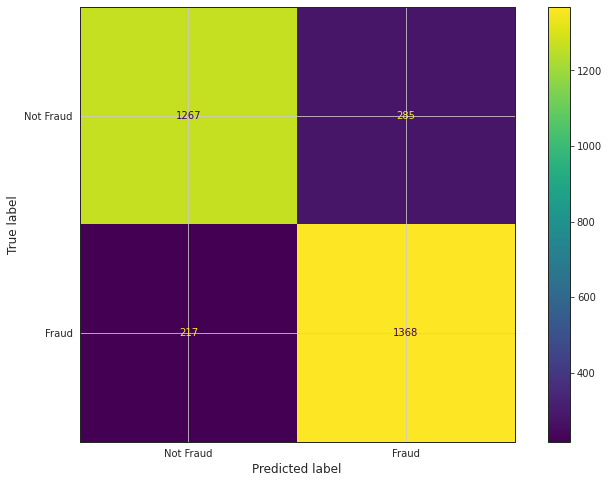

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1,n_estimators = 900)
xgb.fit(X_train_us, y_train_us)

xgb_pred_train = xgb.predict(X_train_us)
xgb_pred = xgb.predict(X_test_us)

plot_confusion_matrix(xgb, X_test_us, y_test_us, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test_us, xgb_pred, zero_division=0))

train_accuracy.append(accuracy_score(y_train_us,xgb_pred_train))
accuracy.append(accuracy_score(y_test_us, xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1552
           1       0.82      0.87      0.84      1585

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137



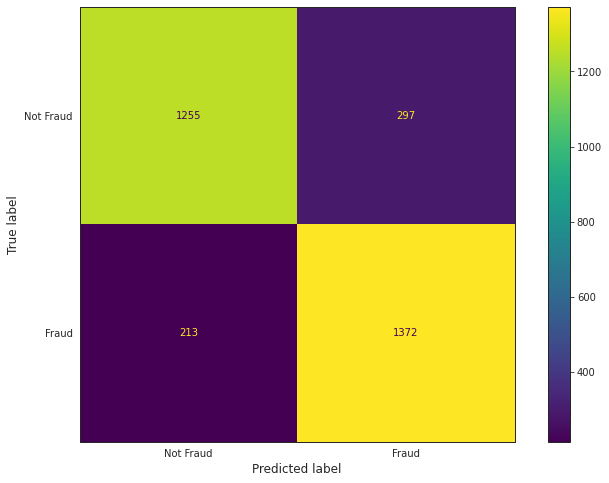

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators = 64,is_unbalance = False)


lgb.fit(X_train_us, y_train_us)

lgb_pred_train = lgb.predict(X_train_us)
lgb_pred = lgb.predict(X_test_us)

accuracy.append(accuracy_score(y_test_us, lgb_pred))
train_accuracy.append(accuracy_score(y_train_us, lgb_pred_train))

plot_confusion_matrix(lgb, X_test_us, y_test_us, values_format = '', 
                      display_labels=['<=50K', '>50K'])
print(classification_report(y_test_us, lgb_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1552
           1       0.78      0.82      0.80      1585

    accuracy                           0.80      3137
   macro avg       0.80      0.79      0.79      3137
weighted avg       0.80      0.80      0.79      3137



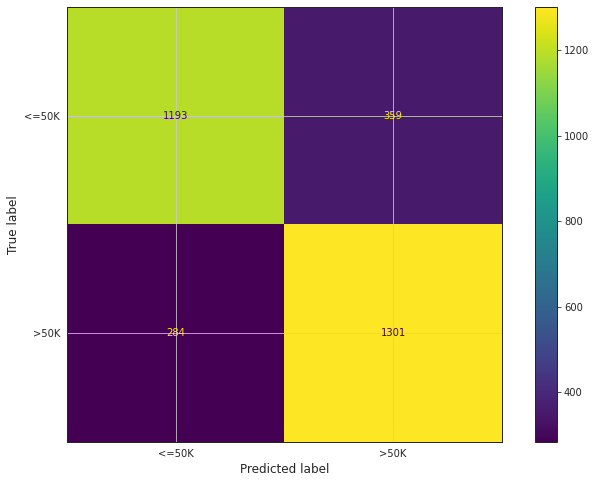

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_us, y_train_us)

gnb_pred_train = gnb.predict(X_train_us)
gnb_pred = gnb.predict(X_test_us)

# model_accuracy_train.append(accuracy_score(y_train_us, gnb_pred_train))
# model_accuracy.append(accuracy_score(y_test, gnb_pred))
# model_balanced_accuracy.append(balanced_accuracy_score(y_test, gnb_pred))

accuracy.append(accuracy_score(y_test, gnb_pred))
train_accuracy.append(accuracy_score(y_train_us, gnb_pred_train))

plot_confusion_matrix(gnb, X_test_us, y_test_us, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test_us, gnb_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1552
           1       0.74      0.83      0.78      1585

    accuracy                           0.77      3137
   macro avg       0.77      0.77      0.77      3137
weighted avg       0.77      0.77      0.77      3137

0.7673151972421868


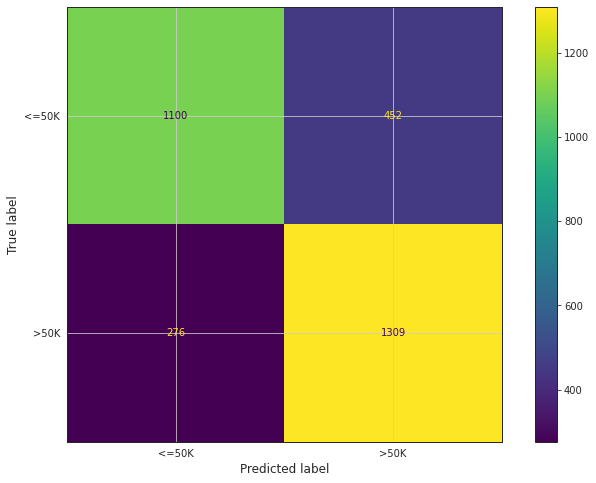

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_us, y_train_us)

bnb_pred_train = bnb.predict(X_train_us)
bnb_pred = bnb.predict(X_test_us)

accuracy.append(accuracy_score(y_test_us, bnb_pred))
train_accuracy.append(accuracy_score(y_train_us, bnb_pred_train))

plot_confusion_matrix(bnb, X_test_us, y_test_us, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test_us, bnb_pred, zero_division=0))

print(balanced_accuracy_score(y_test_us, bnb_pred))

In [ ]:
acc_tab = pd.DataFrame({'Models' : models, 'Train Accuracy': train_accuracy,'Test Accuracy' : accuracy })
acc_tab.head(6)

,Models,Train Accuracy,Test Accuracy
0,DT,0.818414,0.822761
1,RF,0.895895,0.834874
2,XGB,0.878996,0.839974
3,LGBM,0.977122,0.829455
4,GNB,0.794500,0.795027
5,BNB,0.757035,0.767931


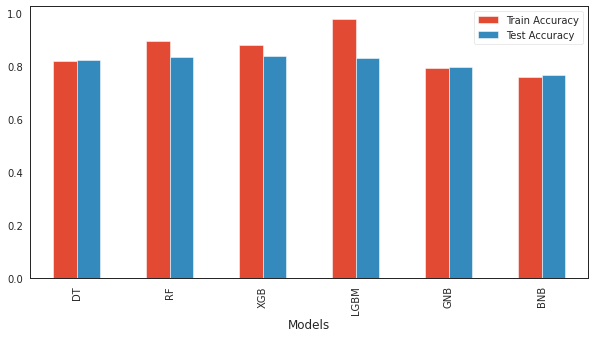

In [ ]:
acc_tab.plot(x="Models", y=["Train Accuracy",'Test Accuracy'], kind="bar",figsize=(10,5))

plt.show()

In [ ]:
# Import standard Scalar:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# X_train= X_train_us
# y_train= y_train_us
# X_test= X_test
# y_test=y_test

In [ ]:
# # Convert training and test dataframes to tensors:
# X_train.shape
# X_train= sc.fit_transform(X_train)
# X_test= sc.fit_transform(X_test)

# #X_train_t=torch.tensor(X_train.values,dtype= torch.float32) 
# #y_train_t=torch.tensor(y_train.values,dtype= torch.float32) 
# #X_test_t=torch.tensor(X_test.values,dtype= torch.float32) 
# #y_test_t= torch.tensor(y_test.values,dtype= torch.float32) 

# X_train_t= torch.from_numpy(X_train)
# X_train_t= X_train_t.type(torch.float32)
# y_train_t=torch.tensor(y_train.values,dtype= torch.float32) 
# X_test_t=torch.from_numpy(X_test)
# X_test_t=X_test_t.type(torch.float32)
# y_test_t= torch.tensor(y_test.values,dtype= torch.float32) 

# y_train_t= y_train_t.reshape(-1, 1)
# y_test_t= y_test_t.reshape(-1, 1)

# def load_array(data_arrays, batch_size, is_train=True):  
#     """Construct a PyTorch data iterator."""
#     dataset = data.TensorDataset(*data_arrays)
#     return data.DataLoader(dataset, batch_size, shuffle=is_train)

# batch_size = 50
# train_iter = load_array((X_train_t, y_train_t), batch_size)
# test_iter = load_array((X_test_t, y_test_t), batch_size)

# # Define the neural network
# input_shape=X_train_t.shape[1]
# print("Input shape is: ",input_shape)
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         # layers here
#         self.l1 = nn.Linear(input_shape,32)
#         self.l2 = nn.Linear(32,64)
#         self.l3 = nn.Linear(64,1)

#         self.batchnorm1 = nn.BatchNorm1d(32)
#         self.batchnorm2 = nn.BatchNorm1d(64)
#         #self.dropout = nn.Dropout(p=0.05)

#     def forward(self, x):    
#         x = torch.relu(self.l1(x))
#         x = self.batchnorm1(x)
#         x = torch.relu(self.l2(x))
#         x = self.batchnorm2(x)
#         #x= self.dropout(x)
#         x = torch.sigmoid(self.l3(x))
#         return x
# # The output of the neural network is a sigmoid function(range from 0 to 1) which makes the network suitable for binary classification.

# #Set the parameters
# learning_rate = 0.01
# num_epochs = 50
# # Model , Optimizer, Loss
# model = Net()
# optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
# criterion = nn.BCELoss()
# #criterion= nn.BCEWithLogitsLoss()
# # Binary Cross Entropy loss is the standard loss function used for binary classification

In [ ]:
# # Training the CNN:

# device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# print(device)
# model.to(device)
# model.train()
# Loss=[]
# Epoch=[]
# ite=0
# for epoch in range(num_epochs):
#   epoch_loss = 0
#   ite +=1
#   for i, (Data, labels) in enumerate(train_iter):
#         #images = Variable(images)
#         #labels = Variable(labels)
#         Data =  Data.to(device)
#         labels  =  labels.to(device)
#         #ite +=1
        
#         optimizer.zero_grad()
#         outputs = model(Data)
#         loss = criterion(outputs, labels)
#         epoch_loss +=loss.item()
#         loss.backward()
#         optimizer.step()
#   print("Loss for each epoch is: ",epoch_loss/len(train_iter))
#   Loss.append(epoch_loss/len(train_iter))

#   Epoch.append(ite)

# plt.plot(Epoch,Loss )
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.title('Training Loss vs Epoch')

In [ ]:
# # Testing the CNN:
# model.eval()
# true_preds, num_preds = 0., 0.

# y_pred_list=[]
# y_labels=[]
# with torch.no_grad():
#     for i, (X_batch,y_batch) in enumerate (test_iter):
#         X_batch = X_batch.to(device)
#         y_batch= y_batch.to(device)
#         y_test_pred = model(X_batch)
#         #y_test_pred = torch.sigmoid(y_test_pred)
#         y_pred_tag = torch.round(y_test_pred)

#         true_preds += (y_pred_tag == y_batch).sum()
#         num_preds += y_batch.shape[0]

#         y_pred_list.append(y_pred_tag.cpu().numpy())
#         y_labels.append(y_batch.cpu().numpy())

# #y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
# #y_pred_list
# #print("The accuracy is: ")
# acc= true_preds / num_preds
# print("The accuracy of this CNN is: ",acc.item())
